In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils

In [3]:
os.listdir()

['Mackey-Glass.py',
 '.DS_Store',
 'playground.py',
 'daily_price_of_electricity.ipynb',
 'requirements.txt',
 'gp_wrapper.py',
 'electricitypricesdataset270624.xlsx',
 '__pycache__',
 'README.md',
 'Octopus_Electric_Tracker_C_London-SILVER-24-04-03-2.csv',
 'sarima_wrapper.py',
 '.gitignore',
 'utils.py',
 '.git',
 'mackey_glass_time_series.csv',
 'system_price.ipynb',
 'chronos_wrapper.py']

###  Agile Octopus London Home Electricity Prices, pounds per kilowatt-hour
Source: [My Smart Energy](https://mysmartenergy.uk/Download-Data/London)

If you have your half hourly consumption data from your smart meter you can use this Agile Octopus Prices file to check what your bill would be with this tariff. Both Local (including British Summer Time) and UTC (GMT) times are shown, please choose the correct column when matching to your consumption data. Prices are shown both with and without VAT added. When comparing bills please also note the daily standing charges.



In [5]:
daily_prices = pd.read_csv("Agile_Octopus_C_London-AGILE-22-07-22.csv")
daily_prices.head()

,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,29 Sep 2022 04:30,29 Sep 2022 05:00,29 Sep 2022 05:30,29 Sep 2022 06:00,38.38,36.55
1,29 Sep 2022 05:00,29 Sep 2022 05:30,29 Sep 2022 06:00,29 Sep 2022 06:30,37.80,36.00
2,29 Sep 2022 05:30,29 Sep 2022 06:00,29 Sep 2022 06:30,29 Sep 2022 07:00,54.85,52.24
3,29 Sep 2022 06:00,29 Sep 2022 06:30,29 Sep 2022 07:00,29 Sep 2022 07:30,48.38,46.08
4,29 Sep 2022 06:30,29 Sep 2022 07:00,29 Sep 2022 07:30,29 Sep 2022 08:00,55.00,52.38


In [9]:
DATE_COLUMN= 'Valid_From_UTC'
DATA_COLUMN = 'Price_Ex_VAT'
daily_prices[DATE_COLUMN] = pd.to_datetime(daily_prices[DATE_COLUMN])

In [10]:
# Graph the daily average system price from 2020 to June 2024



# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(daily_prices[DATE_COLUMN], daily_prices[DATA_COLUMN], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Daily Average System Price (2020 to June 2024)')
plt.xlabel('Date')
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


KeyError: 'Price_Ex_VAT'

<Figure size 1000x600 with 0 Axes>

In [ ]:

def plot_data_for_date_range(data, start_date, end_date,plot=True):
    # Assuming 'system_prices' is your DataFrame
    system_prices['Date'] = pd.to_datetime(system_prices['Date'])

    # Filter the data within the date range
    mask = (system_prices['Date'] >= start_date) & (system_prices['Date'] <= end_date)
    filtered_data = system_prices.loc[mask]

    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    std_dev = filtered_data['Daily average'].std()

    # Identify data points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    if plot:
        # Plot the daily average system price for the filtered date range
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_data['Date'], filtered_data['Daily average'], linestyle='-', color='b')

        # Highlight regions outside 1 standard deviation
        plt.fill_between(filtered_data['Date'], mean_price - std_dev, mean_price + std_dev, color='yellow', alpha=0.3)

        # Highlight regions outside 2 standard deviations
        plt.fill_between(filtered_data['Date'], mean_price - 2 * std_dev, mean_price + 2 * std_dev, color='red', alpha=0.3)

        # Customize the plot
        plt.title(f'Daily Average System Price from {start_date} to {end_date}')
        plt.xlabel('Date')
        plt.ylabel('Daily Average Price')
        plt.grid(True)
        plt.xticks(rotation=45)

        # Show plot
        plt.tight_layout()
        plt.show()


    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    median_price = filtered_data['Daily average'].median()
    variance_price = filtered_data['Daily average'].var()
    std_dev = filtered_data['Daily average'].std()
    min_price = filtered_data['Daily average'].min()
    max_price = filtered_data['Daily average'].max()

    # Calculate the number of points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    
    num_one_std_dev_outliers = one_std_dev_outliers.shape[0]
    num_two_std_dev_outliers = two_std_dev_outliers.shape[0]

    total_points = filtered_data.shape[0]
    pct_one_std_dev_outliers = (num_one_std_dev_outliers / total_points) * 100
    pct_two_std_dev_outliers = (num_two_std_dev_outliers / total_points) * 100

    # Print the descriptive statistics
    print(f'Descriptive Statistics from {start_date} to {end_date}:')
    print(f'Mean: {mean_price}')
    print(f'Median: {median_price}')
    print(f'Variance: {variance_price}')
    print(f'Minimum: {min_price}')
    print(f'Maximum: {max_price}')
    print(f'Number of points outside 1 standard deviation: {num_one_std_dev_outliers} ({pct_one_std_dev_outliers:.2f}%)')
    print(f'Number of points outside 2 standard deviations: {num_two_std_dev_outliers} ({pct_two_std_dev_outliers:.2f}%)')

    # Prepare dictionary with descriptive statistics and outlier information
    statistics_dict = {
        'start_date': start_date,
        'end_date': end_date,
        'mean_price': mean_price,
        'median_price': median_price,
        'variance_price': variance_price,
        'std_deviation': std_dev,
        'min_price': min_price,
        'max_price': max_price,
        'num_outliers_1_std_dev': num_one_std_dev_outliers,
        'pct_outliers_1_std_dev': pct_one_std_dev_outliers,
        'num_outliers_2_std_dev': num_two_std_dev_outliers,
        'pct_outliers_2_std_dev': pct_two_std_dev_outliers
    }

    return statistics_dict    


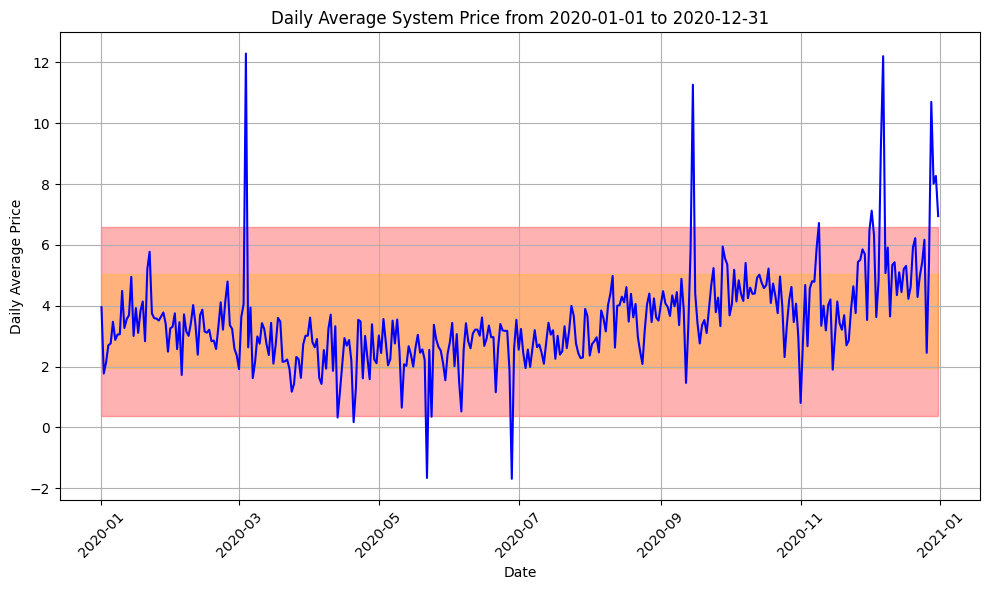

Descriptive Statistics from 2020-01-01 to 2020-12-31:
Mean: 3.494478142076503
Median: 3.3355
Variance: 2.408568085822292
Minimum: -1.691
Maximum: 12.289
Number of points outside 1 standard deviation: 69 (18.85%)
Number of points outside 2 standard deviations: 15 (4.10%)


{'start_date': '2020-01-01',
 'end_date': '2020-12-31',
 'mean_price': 3.494478142076503,
 'median_price': 3.3355,
 'variance_price': 2.408568085822292,
 'std_deviation': 1.551956212598246,
 'min_price': -1.691,
 'max_price': 12.289,
 'num_outliers_1_std_dev': 69,
 'pct_outliers_1_std_dev': 18.852459016393443,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.098360655737705}

In [6]:
plot_data_for_date_range(system_prices,'2020-01-01', '2020-12-31')

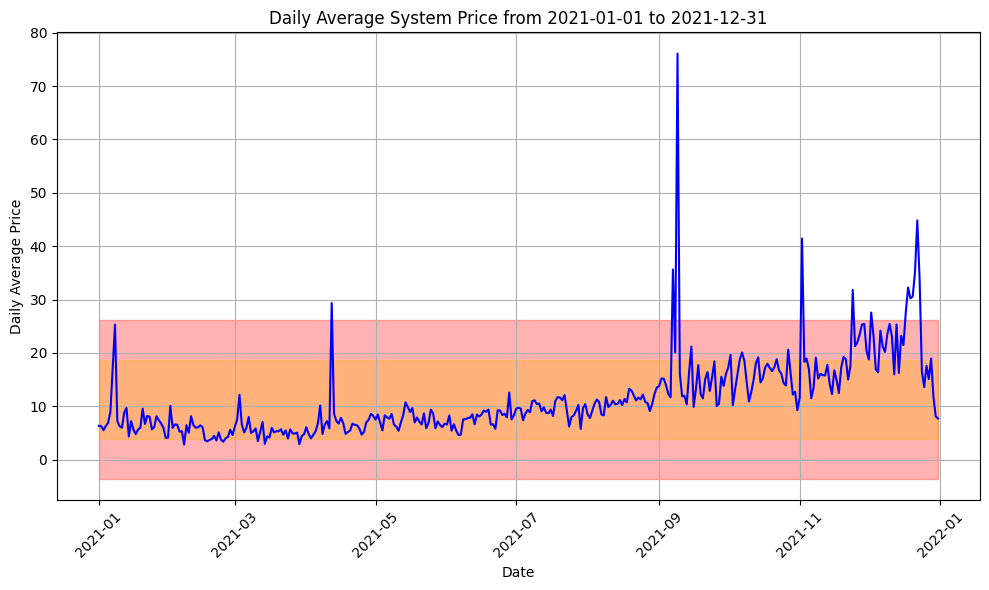

Descriptive Statistics from 2021-01-01 to 2021-12-31:
Mean: 11.248369863013698
Median: 9.144
Variance: 54.937008464473884
Minimum: 2.827
Maximum: 76.078
Number of points outside 1 standard deviation: 54 (14.79%)
Number of points outside 2 standard deviations: 13 (3.56%)


{'start_date': '2021-01-01',
 'end_date': '2021-12-31',
 'mean_price': 11.248369863013698,
 'median_price': 9.144,
 'variance_price': 54.937008464473884,
 'std_deviation': 7.411950381948997,
 'min_price': 2.827,
 'max_price': 76.078,
 'num_outliers_1_std_dev': 54,
 'pct_outliers_1_std_dev': 14.794520547945206,
 'num_outliers_2_std_dev': 13,
 'pct_outliers_2_std_dev': 3.5616438356164384}

In [7]:
plot_data_for_date_range(system_prices,'2021-01-01', '2021-12-31')

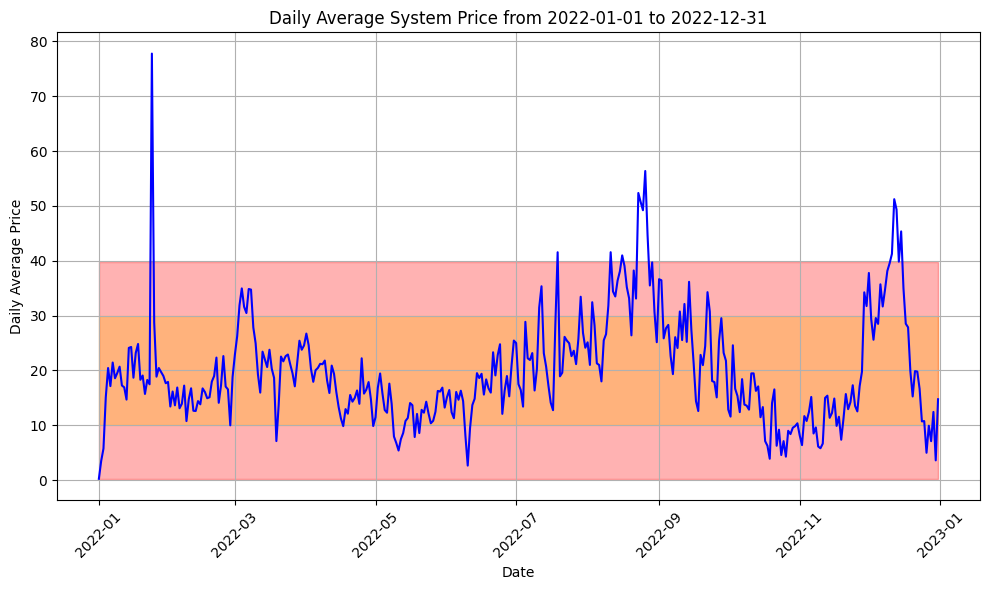

Descriptive Statistics from 2022-01-01 to 2022-12-31:
Mean: 20.008887671232877
Median: 18.006
Variance: 97.56512746811683
Minimum: 0.236
Maximum: 77.79
Number of points outside 1 standard deviation: 95 (26.03%)
Number of points outside 2 standard deviations: 15 (4.11%)


{'start_date': '2022-01-01',
 'end_date': '2022-12-31',
 'mean_price': 20.008887671232877,
 'median_price': 18.006,
 'variance_price': 97.56512746811683,
 'std_deviation': 9.877506136070826,
 'min_price': 0.236,
 'max_price': 77.79,
 'num_outliers_1_std_dev': 95,
 'pct_outliers_1_std_dev': 26.027397260273972,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.10958904109589}

In [8]:
plot_data_for_date_range(system_prices,'2022-01-01', '2022-12-31')

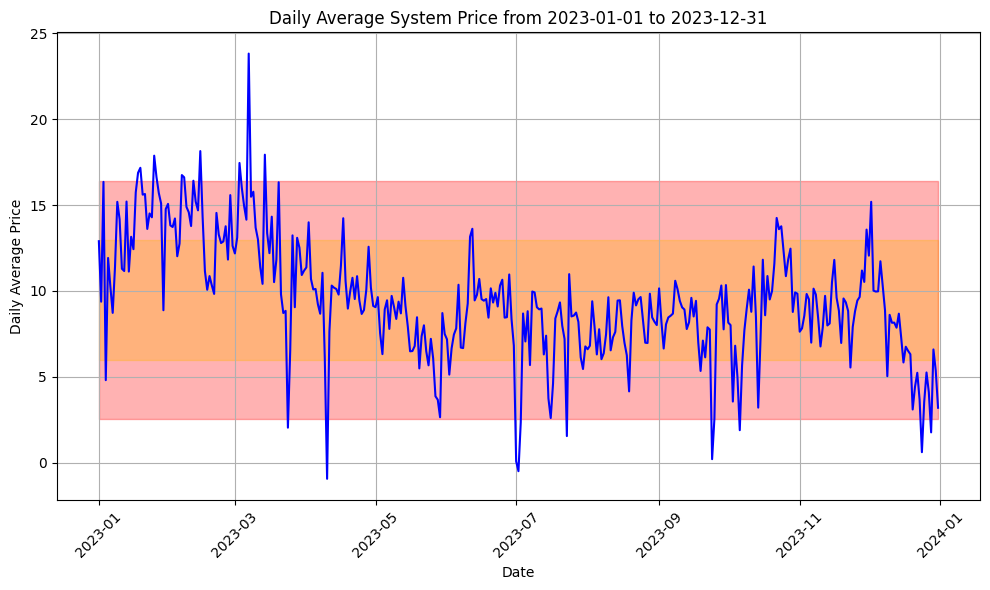

Descriptive Statistics from 2023-01-01 to 2023-12-31:
Mean: 9.469106849315068
Median: 9.269
Variance: 12.055958716573835
Minimum: -0.934
Maximum: 23.818
Number of points outside 1 standard deviation: 102 (27.95%)
Number of points outside 2 standard deviations: 21 (5.75%)


{'start_date': '2023-01-01',
 'end_date': '2023-12-31',
 'mean_price': 9.469106849315068,
 'median_price': 9.269,
 'variance_price': 12.055958716573835,
 'std_deviation': 3.472169165892387,
 'min_price': -0.934,
 'max_price': 23.818,
 'num_outliers_1_std_dev': 102,
 'pct_outliers_1_std_dev': 27.945205479452056,
 'num_outliers_2_std_dev': 21,
 'pct_outliers_2_std_dev': 5.7534246575342465}

In [9]:
plot_data_for_date_range(system_prices,'2023-01-01', '2023-12-31')

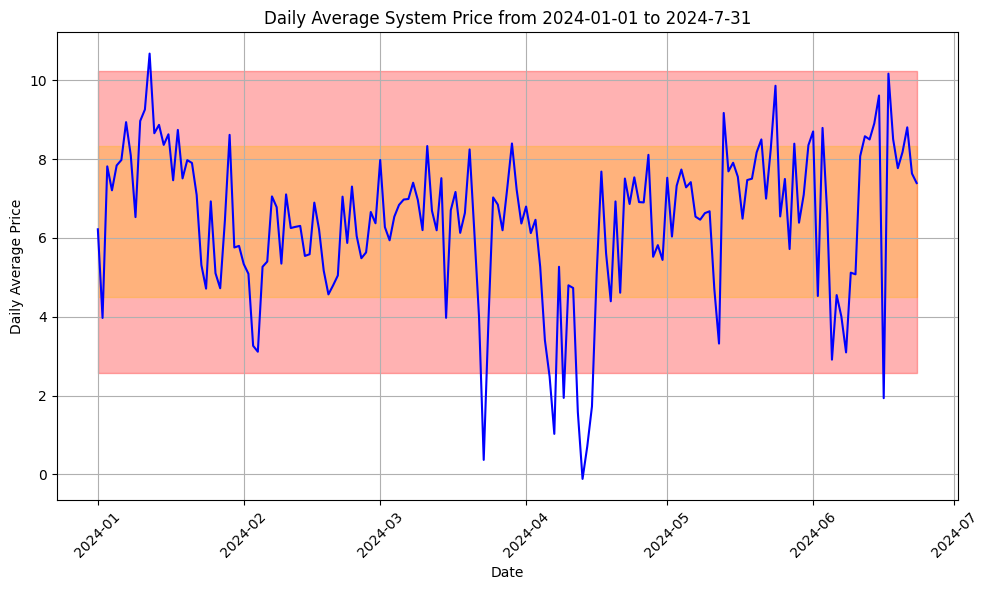

Descriptive Statistics from 2024-01-01 to 2024-7-31:
Mean: 6.412742857142857
Median: 6.677
Variance: 3.6673070197044324
Minimum: -0.112
Maximum: 10.677
Number of points outside 1 standard deviation: 47 (26.86%)
Number of points outside 2 standard deviations: 10 (5.71%)


{'start_date': '2024-01-01',
 'end_date': '2024-7-31',
 'mean_price': 6.412742857142857,
 'median_price': 6.677,
 'variance_price': 3.6673070197044324,
 'std_deviation': 1.9150214149466926,
 'min_price': -0.112,
 'max_price': 10.677,
 'num_outliers_1_std_dev': 47,
 'pct_outliers_1_std_dev': 26.857142857142858,
 'num_outliers_2_std_dev': 10,
 'pct_outliers_2_std_dev': 5.714285714285714}

In [10]:
plot_data_for_date_range(system_prices,'2024-01-01', '2024-7-31')

## Six Months Prediction

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=767.382, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=745.262, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=725.050, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=765.406, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=723.555, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=724.999, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=721.428, Time=0.02 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=723.130, Time=0.07 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=723.150, Time=0.07 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=744.085, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=722.690, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=72

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 This problem is unconstrained.


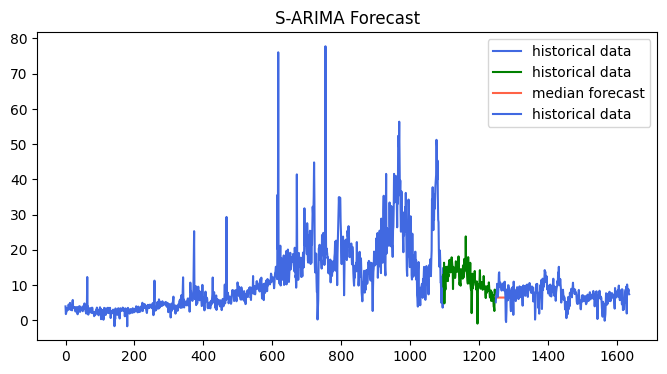

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


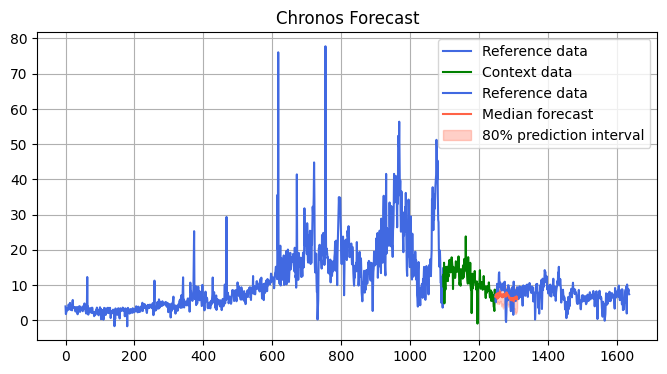

y_pred
[6.40469687 6.40466539 6.40463389 6.40460237 6.40457082 6.40453925
 6.40450766 6.40447604 6.4044444  6.40441273 6.40438105 6.40434933
 6.4043176  6.40428584 6.40425405 6.40422224 6.40419041 6.40415856
 6.40412668 6.40409478 6.40406285 6.4040309  6.40399893 6.40396693
 6.40393491 6.40390287 6.4038708  6.40383871 6.40380659 6.40377445
 6.40374229 6.40371011 6.4036779  6.40364566 6.40361341 6.40358113
 6.40354882 6.4035165  6.40348414 6.40345177 6.40341937 6.40338695
 6.4033545  6.40332203 6.40328954 6.40325702 6.40322448 6.40319192
 6.40315933 6.40312672 6.40309409 6.40306143 6.40302875 6.40299605
 6.40296332 6.40293056 6.40289779 6.40286499 6.40283217 6.40279932
 6.40276645 6.40273356 6.40270064 6.4026677 ]
GP MSE: 9.101733617893458


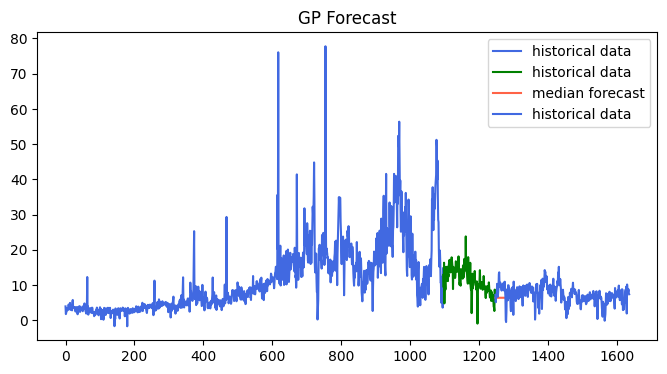

--- RESULTS --- 
sarima_mse 9.099176432717707
chronos_mse 7.969238126243863
gp_mse 9.268759250218737


In [11]:
start = '2023-01-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## One Year Context Prediction

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2212.322, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2195.764, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2186.582, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2210.329, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2184.696, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2186.587, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2188.564, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2174.131, Time=0.04 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2175.869, Time=0.25 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2175.846, Time=0.29 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2177.651, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2193.975, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2176.117, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2176.117, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


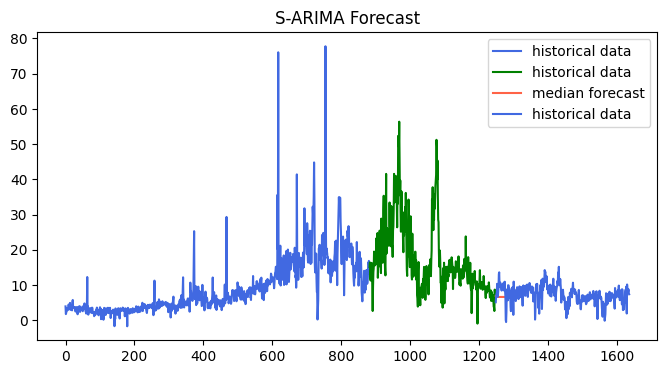

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


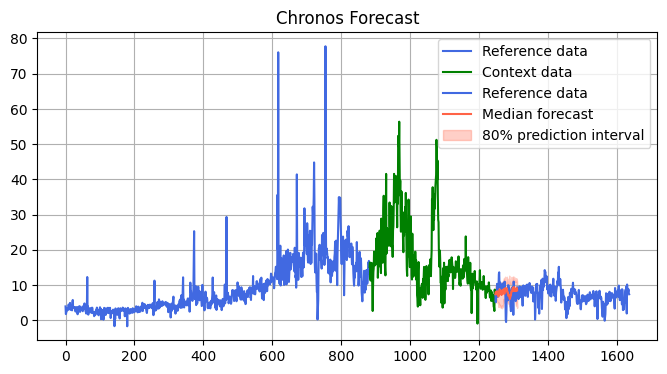

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


y_pred
[9.48440832 9.47528975 9.48043078 9.47951625 9.47616004 9.48362454
 9.47241326 9.48682851 9.46990734 9.48851509 9.46912176 9.48836156
 9.47020684 9.48639734 9.47295498 9.48299826 9.47684036 9.47881472
 9.48111954 9.4746472  9.48497373 9.4712931  9.48766543 9.46939419
 9.4886796  9.46931381 9.4878222  9.47106735 9.4852573  9.4743193
 9.48147569 9.47844745 9.47720095 9.48266189 9.47325101 9.48615621
 9.47038163 9.48826178 9.46914183 9.48857572 9.46976886 9.48703797
 9.47214274 9.48394278 9.47580928 9.47988241 9.48006691 9.47563377
 9.48410096 9.47200978 9.48713952 9.46970385 9.48860119 9.4691572
 9.48820628 9.47047443 9.48603038 9.47340352 9.48248984 9.47738403
 9.47826213 9.48165431 9.47415616 9.48539727]
GP MSE: 9.579625193439277


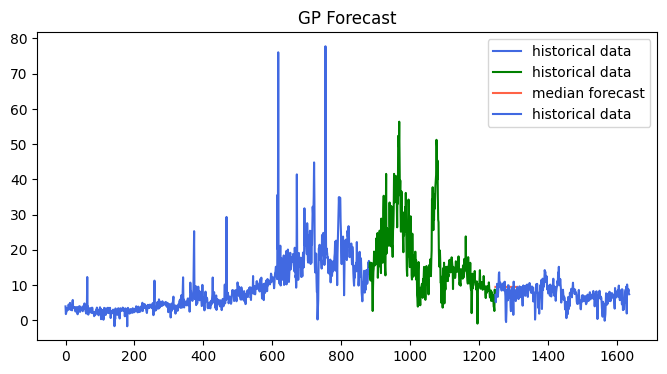

--- RESULTS --- 
sarima_mse 8.653385495234991
chronos_mse 8.33352104365921
gp_mse 9.533185188081625


In [12]:
start = '2022-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Two Year Context Comparison

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4762.414, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4665.129, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4618.476, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4760.414, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4617.978, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=4618.631, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=4619.847, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4602.758, Time=0.13 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=4603.086, Time=0.71 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=4602.885, Time=0.72 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=4603.992, Time=0.96 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4663.959, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=4601.204, Time=0.10 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=4601.915, Time=0.43 sec
 ARIMA(2,1,1)(0,0,1

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


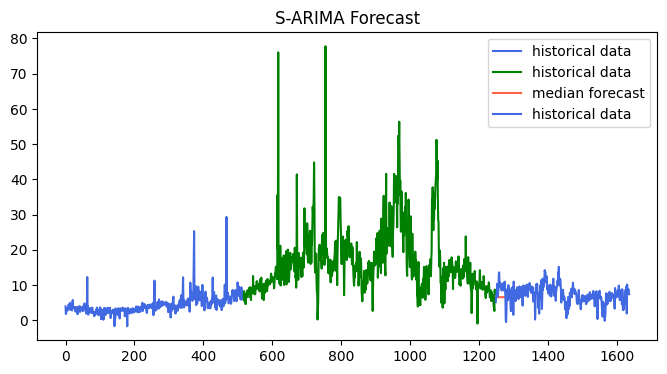

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


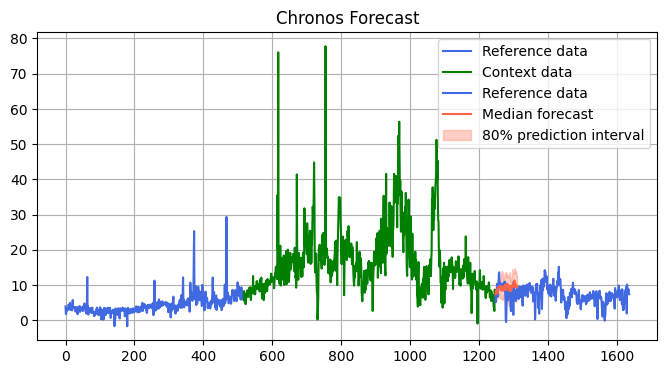

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


y_pred
[-6.40392555e-05  5.01048382e-05 -2.77795230e-05  4.42320552e-05
 -1.85914162e-05  4.16864972e-05 -4.33053105e-05  7.60646815e-05
 -5.90410255e-05  6.91614080e-05 -4.33022235e-05  5.27665362e-05
 -2.10079296e-05  4.30063433e-05 -1.98196687e-05  4.26573891e-05
 -2.26005033e-05  4.06563961e-05 -1.84363927e-05  3.18138360e-05
  1.25804983e-05 -1.37016405e-05  6.03357621e-05 -5.74492064e-05
  6.42958222e-05 -2.41121525e-05  3.25650063e-05 -8.68899133e-06
  2.53563758e-05  6.74259003e-07  4.64545941e-06  1.95765735e-05
  1.09965168e-05  5.23195182e-06  1.92048379e-05 -1.92607214e-06
  1.82850213e-05  1.77462033e-05 -1.21775622e-05  4.12296127e-05
 -9.02885599e-06  1.63384857e-05  4.23264626e-06  1.34132779e-06
  2.72335878e-05 -2.78098239e-05  4.99344164e-05 -2.50236285e-05
  4.01011904e-05 -2.61977008e-05  5.43632859e-05 -4.58446612e-05
  6.79056607e-05 -4.26245895e-05  5.64370568e-05 -4.52440328e-05
  7.45293715e-05 -5.63953439e-05  9.35088834e-05 -9.91725659e-05
  1.38128767e-04 -

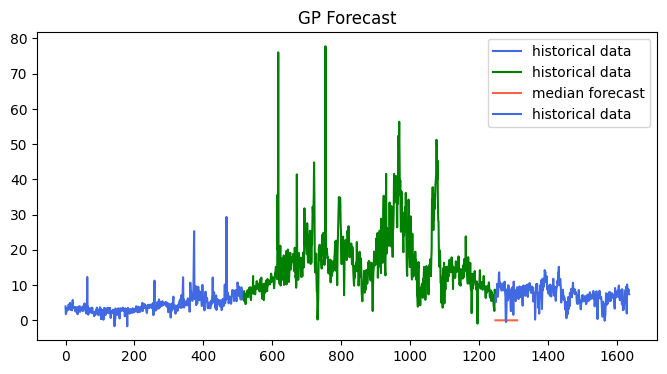

--- RESULTS --- 
sarima_mse 8.81496046623615
chronos_mse 8.861328912760007
gp_mse 69.41878276436054


In [13]:
start = '2021-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Three Year Context

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6783.350, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6636.164, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6560.176, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6781.350, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6560.596, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=6561.290, Time=0.96 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=6559.977, Time=1.37 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=6561.646, Time=2.12 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=6561.173, Time=3.24 sec
 ARIMA(0,1,1)(1,0,3)[12] intercept   : AIC=6562.738, Time=6.67 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=6785.186, Time=0.93 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=6533.234, Time=1.54 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=6533.761, Time=0.75 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=6535.075, Time=3.55 sec
 ARIMA(1,1,1)(0,0,3

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97940D+00    |proj g|=  5.61243D-02



 This problem is unconstrained.


At iterate    5    f=  2.97358D+00    |proj g|=  6.76858D-03

At iterate   10    f=  2.97328D+00    |proj g|=  2.76521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     16      1     0     0   4.727D-06   2.973D+00
  F =   2.9732719411581305     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


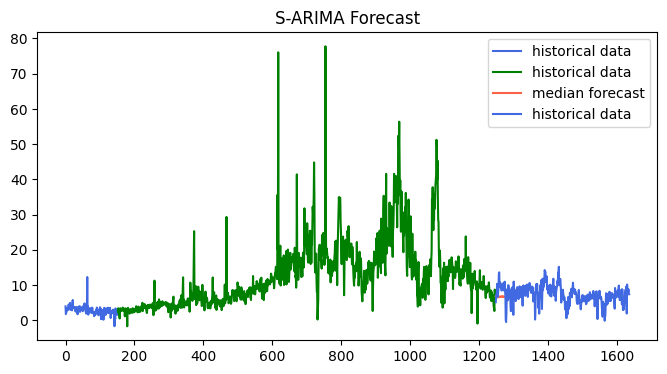

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


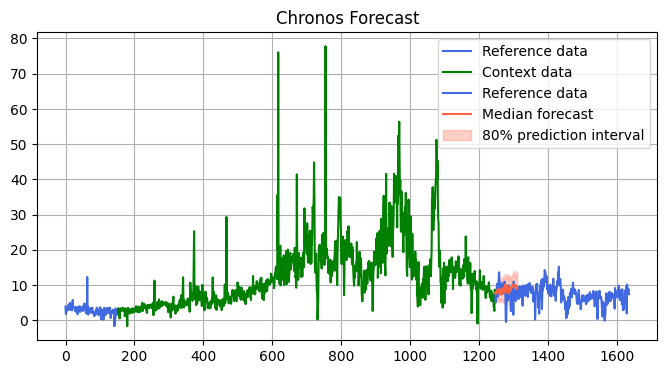

y_pred
[8.76765411 8.78647401 8.75442427 8.77275739 8.74146047 8.75916355
 8.72875795 8.74569187 8.71631159 8.73234215 8.70411593 8.71911462
 8.6921652  8.70600987 8.68045329 8.69302891 8.66897384 8.68017308
 8.65772019 8.66744405 8.64668544 8.6548438  8.63586249 8.6423746
 8.62524401 8.63003897 8.61482253 8.61783966 8.60459042 8.60577961
 8.59453994 8.59386192 8.58466328 8.58208983 8.57495256 8.57046668
 8.56539989 8.55899589 8.5559974  8.54768091 8.54673725 8.53652517
 8.53761167 8.52553211 8.528613   8.51470509 8.51973373 8.50404738
 8.51096651 8.49356213 8.50230416 8.48325233 8.49373977 8.47312081
 8.48526665 8.46317017 8.47687839 8.45340278 8.46856891 8.44382075
 8.46033242 8.43442591 8.45216351 8.42521979]
GP MSE: 7.420656126860606


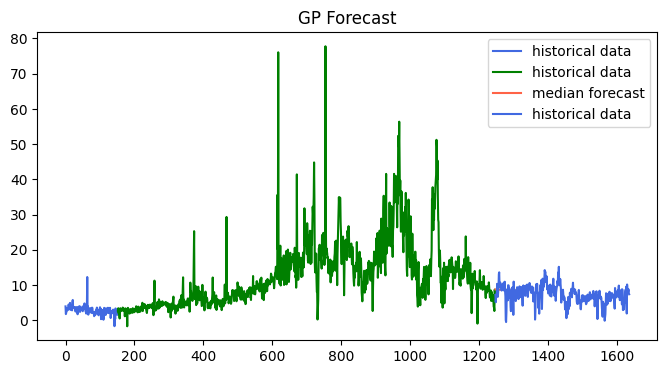

--- RESULTS --- 
sarima_mse 8.526424178792391
chronos_mse 9.139943379155635
gp_mse 7.403111398475483


In [14]:
start = '2020-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

In [15]:
from gp_wrapper import gp_predict

gp_predict(system_prices, 'Daily average', 0, 100, 10)


/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by GaussianProcessRegressor.